In [1]:
pip install utils


Note: you may need to restart the kernel to use updated packages.


In [2]:
from utils import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

# Notation

In [4]:
import numpy as np
import matplotlib.pyplot as plt

As in the lecture, you will use the motivating example of housing price prediction.
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our data or training set. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

Size (1000 sqft)	Price (1000s of dollars)
1.0	300
2.0	500
You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.

In [5]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.5, 3.0])
y_train = np.array([300.0, 500.0, 700.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1.  2.5 3. ]
y_train = [300. 500. 700.]


## Number of training examples m
You will use m to denote the number of training examples. Numpy arrays have a .shape parameter. x_train.shape returns a python tuple with an entry for each dimension. x_train.shape[0] is the length of the array and number of examples as shown below.

In [6]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (3,)
Number of training examples is: 3


In [7]:
# m is the number of training examples
#len lenght function 
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 3


Training example x_i, y_i
You will use (x (𝑖)
 , y (𝑖)
 ) to denote the  𝑖𝑡ℎ
  training example. Since Python is zero indexed, (x (0)
 , y (0)
 ) is (1.0, 300.0) and (x (1)
 , y (1)
 ) is (2.0, 500.0).

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of x_train is x_train[0]. Run the next code block below to get the  𝑖𝑡ℎ
  training example.

In [8]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


# Plotting the data

You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

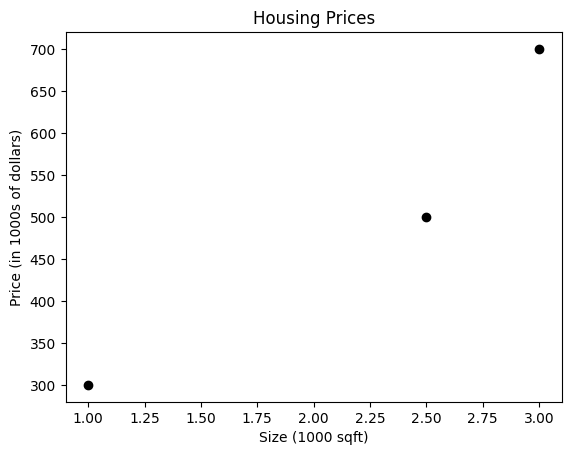

In [9]:
plt.scatter(x_train, y_train, marker='o', c='black')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

# Model function

As described in lecture, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/> <br/> <br/> 

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$. 

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [10]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


# compute the value of  fw,b(x(i))
 

Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [11]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        print("f_wb",f_wb)
        
    return f_wb
    

f_wb [200.   0.   0.]
f_wb [200. 350.   0.]
f_wb [200. 350. 400.]


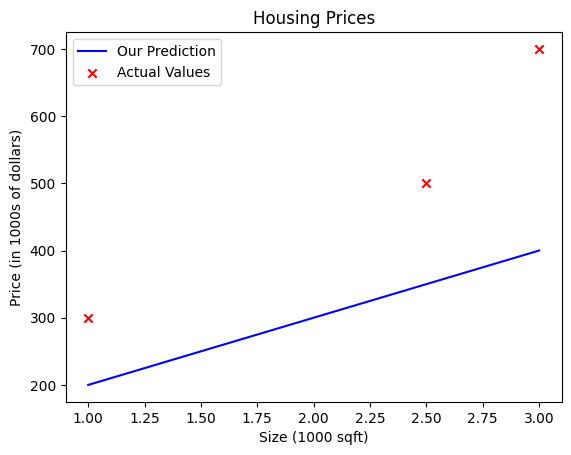

In [12]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

As you can see, setting  𝑤=100
  and  𝑏=100
  does not result in a line that fits our data.

Challenge
Try experimenting with different values of  𝑤
  and  𝑏
 . What should the values be for a line that fits our data?

w: 200
b: 100
f_wb [300.   0.   0.]
f_wb [300. 600.   0.]
f_wb [300. 600. 700.]


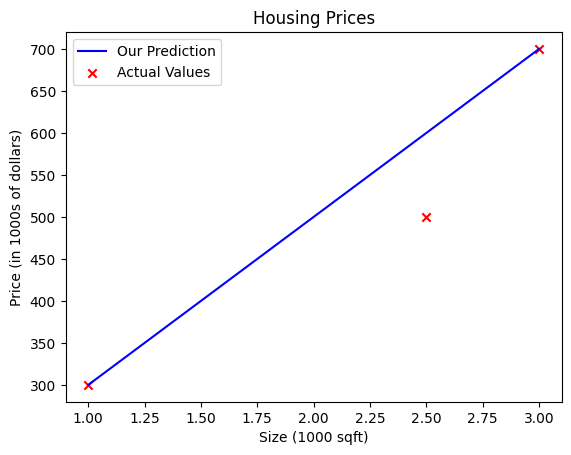

In [13]:
w = 200
b = 100
print(f"w: {w}")
print(f"b: {b}")


tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

# Prediction

Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of  𝑥
  are in 1000's of sqft,  𝑥
  is 1.2

In [14]:
w = 200                         
b = 100    
x_i = 0.7
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$240 thousand dollars



# Cost function

you will implement and explore the cost function for linear regression with one variable.

w: 0
b: 1.5
f_wb [1.5 0.  0. ]
f_wb [1.5 1.5 0. ]
f_wb [1.5 1.5 1.5]


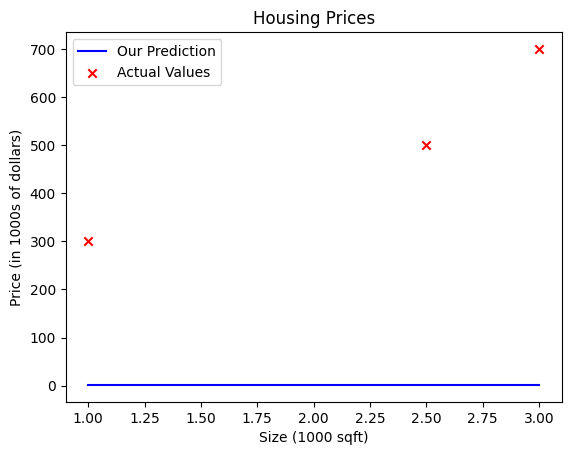

In [15]:
w = 0
b = 1.5
print(f"w: {w}")
print(f"b: {b}")


tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [16]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

In [17]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [18]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In [20]:
# Change the model parameters
w = 300  # Change the value of w
b = 200  # Change the value of b

# Define the size of the house you want to predict (in 1000s of square feet)
x_i = 1.5  # Change this value to the size you want to predict

# Use the updated model to make a prediction
predicted_price = w * x_i + b

print(f"The predicted price for a {x_i * 1000} sqft house is ${predicted_price:.0f} thousand dollars.")


The predicted price for a 1500.0 sqft house is $650 thousand dollars.
